### Importation de toutes les librairies nécessaire

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
import requests
import geopandas as gpd
from ydata_profiling import ProfileReport

In [8]:
class TrajetCovoiturage:
    def __init__(self, année):
        self.année = année
        url = "https://static.data.gouv.fr/resources/trajets-realises-en-covoiturage-registre-de-preuve-de-covoiturage/20230921-111347/" + self.année + ".csv"
        
        try:
            response = requests.get(url)
            response.raise_for_status()  # Gérer les erreurs HTTP

            # Lire le CSV directement en DataFrame sans passer par StringIO
            self.df = pd.read_csv(StringIO(response.text), sep=";")
            # Filtrer les données pour Rouen
            self.df=self.filter_data()
            #self.df = self.data[(self.data['journey_start_town'] == 'Rouen') | (self.data['journey_end_town'] == 'Rouen')]
        
        except requests.exceptions.HTTPError as http_err:
            print(f"Erreur HTTP lors du téléchargement du fichier CSV : {http_err}")
        except Exception as err:
            print(f"Une erreur s'est produite : {err}")
    def return_data(self):
        return self.df
    def Visualisation_data(self):
        df = self.df

        print("Les 5 premières lignes du DataFrame :")
        print(df.head(5))

        print("\nNoms des colonnes :")
        print(df.columns)

        print("La dimension du dataset :")
        print(df.shape)

        # Statistiques récapitulatives pour les colonnes numériques
        print("\nStatistiques récapitulatives pour les colonnes numériques :")
        print(df.describe())

    
    def get_value_counts(self,column_name):
        dataframe=self.df
        return dataframe[column_name].value_counts()
              
    def calculate_missing_percentage(self):
        """
        Calculate the percentage of missing values for each column in a DataFrame and sort them in ascending order.

        Args:
            dataframe (pd.DataFrame): The DataFrame containing the data.

        Returns:
            pd.Series: A Series containing the missing value percentages sorted in ascending order.
        """
        dataframe=self.df
        missing_percentage = (dataframe.isna().sum() / dataframe.shape[0]).sort_values(ascending=True)
        return missing_percentage
    
    def plot_pie_chart(self,column):
        """
        Create a pie chart from a Pandas Series using Matplotlib.

        Args:
            data (pd.Series): The data for the pie chart.
            title (str): Title of the chart.

        Returns:
            None
        """
        data=self.df[str(column)].value_counts()
        plt.figure(figsize=(8, 8))  # Ajustez la taille du graphique si nécessaire
        explosions = [0.2] * len(data)
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explosions)

        plt.title(column)
        plt.axis('equal')  # Assurez-vous que le graphique est un cercle et non une ellipse

        plt.show()

    def plot_nan_heatmap(self):
        """
        Create a heatmap of NaN (missing) values in a DataFrame using Seaborn.

        Args:
            dataframe (pd.DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        dataframe=self.df
        nan_map = dataframe.isna()

        plt.figure(figsize=(10, 6))  # Ajustez la taille de la figure si nécessaire
        sns.heatmap(nan_map, cmap='viridis', cbar=True)

        plt.title('Heatmap des valeurs NaN')
        plt.show()
    

    def scatter_plot_with_categories(self,x_col, y_col, category_col, title=None):
        """
        Create a scatter plot with different colors for each category.

        Args:
            data (pd.DataFrame): The data for the scatter plot.
            x_col (str): Name of the column for the x-axis.
            y_col (str): Name of the column for the y-axis.
            category_col (str): Name of the column to categorize by (for different colors).
            title (str): Title of the chart.

        Returns:
            None
        """
        data=self.df
        plt.figure(figsize=(8, 6))  # Ajustez la taille du graphique si nécessaire
        sns.scatterplot(data=data, x=x_col, y=y_col, hue=category_col, palette='viridis', alpha=0.9)

        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(title)

        plt.legend(title=category_col)

        plt.xticks(rotation=45)  # Pour faire pivoter les étiquettes de l'axe des x, si nécessaire
        plt.show()

    def plot_geographical_data(self,longitude_col, latitude_col, title=None):
        """
        Create a scatter plot of geographical data.

        Args:
            data (pd.DataFrame): The data for the scatter plot.
            longitude_col (str): Name of the column for longitude values.
            latitude_col (str): Name of the column for latitude values.
            title (str): Title of the chart.

        Returns:
            None
        """
        data=self.df
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.scatter(data[longitude_col], data[latitude_col], color='blue', alpha=0.7, linewidth=0.5)

        plt.title(title)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        ax.grid(True)

        plt.show()

    
    def plot_numeric_distributions(self):
        """
        Create histograms for numeric columns in the given DataFrame.

        Args:
            dataframe (pd.DataFrame): The DataFrame containing numeric columns.

        Returns:
            None
        """
        dataframe=self.df
        numeric_cols = dataframe.select_dtypes(include=['float', 'int'])

        for col in numeric_cols.columns:
            plt.figure()
            sns.distplot(dataframe[col], kde=False)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
              
    def create_pair_plot(self, col_to_color):
        """
        Crée une matrice de graphiques de dispersion (pair plot) pour un DataFrame donné,
        en utilisant une colonne spécifique pour la coloration des points.

        :param df: DataFrame contenant les données.
        :param col_to_color: Nom de la colonne à utiliser pour la coloration.
        """
        df=self.df
        sns.set(style="ticks")
        sns.pairplot(df, hue=col_to_color, palette="Set2")
        plt.show()
    
    def plot_distribution_comparison(self,column_to_compare, group_column):
        """
        Crée un graphique de distribution comparant deux groupes ('OUI' et 'NON') pour chaque colonne numérique.

        :param df: DataFrame contenant les données.
        :param column_to_compare: Nom de la colonne numérique pour laquelle comparer la distribution.
        :param group_column: Nom de la colonne utilisée pour définir les deux groupes ('OUI' et 'NON').
        """
        df=self.df
        oui_df = df[df[group_column] == 'OUI']
        non_df = df[df[group_column] == 'NON']

        for col in column_to_compare:
            plt.figure(figsize=(8, 6))
            print("colonne:",col)
            sns.distplot(oui_df[col], label='Oui')
            sns.distplot(non_df[col], label='Non')
            plt.title(f'Distribution de {col} par groupe ({group_column})')
            plt.legend()
            plt.show()
              
    def plot_count(self,X):
        """
        Crée un graphique de comptage avec des barres groupées pour les pays de départ en fonction de la présence ou de l'absence d'incitations.

        :param df: DataFrame contenant les données.
        """
        df=self.df
        plt.figure(figsize=(10, 6))
        sns.countplot(x=X, hue='has_incentive', data=df)
        plt.title("Graphique de comptage par pays de départ et incitations")
        plt.xticks(rotation=45)
        plt.show()
    
    def correlation_with_duration(self,column:str):
        """
        Calcule la corrélation entre la colonne 'journey_duration' et toutes les autres colonnes du DataFrame,
        puis trie les résultats par ordre croissant de corrélation avec 'journey_duration'.

        :param df: DataFrame contenant les données.
        :return: DataFrame contenant les colonnes et leurs corrélations avec 'journey_duration'.
        """
        corr_with_duration = self.df.corr()[column].sort_values()
        return corr_with_duration
    
    def generate_crosstab(self,column1, column2):
        
        """
        Génère une table croisée entre deux colonnes d'un DataFrame.

        :param df: DataFrame contenant les données.
        :param column1: Nom de la première colonne.
        :param column2: Nom de la deuxième colonne.
        :return: Table croisée.
        """
        df=self.df
        crosstab = pd.crosstab(df[column1], df[column2])
        return crosstab
    
    def plot_dtypes_pie_chart(self):
        # Obtenez le décompte des types de données
        dtype_counts = self.df.dtypes.value_counts()

        # Créez un graphique en camembert
        plt.figure(figsize=(8, 8))
        plt.pie(dtype_counts, labels=dtype_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

        # Ajoutez un titre
        plt.title('Décompte des types de données')

        # Assurez-vous que le graphique est un cercle et non une ellipse
        plt.axis('equal')

        # Affichez le graphique
        plt.show()
    def count_unique_values(self,column_name):
        """
        Compte les occurrences des valeurs uniques dans la colonne spécifiée du DataFrame.

        Args:
        column_name (str): Nom de la colonne à analyser.
        df (pd.DataFrame): DataFrame contenant la colonne spécifiée.

        Returns:
        pd.Series: Série contenant le décompte des valeurs uniques.
        """
        return self.df[column_name].value_counts()
    def display_unique_values(self):
        """
        Affiche les valeurs uniques pour toutes les colonnes de type "objet" d'un DataFrame.
        """
        for col in self.df.select_dtypes('object'):
            unique_values = ', '.join(str(val) for val in self.df[col].unique())
            print(f'{col:<20} | Valeurs uniques : {unique_values}')
    def filter_data(self):
        try:
            rouen_data = self.df[(self.df['journey_start_town'] == 'Rouen') | (self.df['journey_end_town'] == 'Rouen')]
            return rouen_data
        except Exception as e:
            print(f"Une erreur s'est produite lors de la filtration des données : {e}")

    
    def create_route_map(self):
        """
        Crée une carte Folium avec des marqueurs de départ en bleu et des marqueurs d'arrivée en rouge.

        :param data: Les données à afficher sur la carte.
        """
        data=self.df
        # Créez une carte centrée sur une latitude et une longitude initiales
        ma_carte = folium.Map(location=[data['journey_start_lat'].mean(), data['journey_start_lon'].mean()], zoom_start=10)

        # Ajoutez des marqueurs pour chaque trajet de départ (marqueurs bleus)
        for index, row in data.iterrows():
            folium.Marker([row['journey_start_lat'], row['journey_start_lon']],
                          popup=f"Trajet ID: {row['journey_id']} - Départ").add_to(ma_carte)

        # Ajoutez des marqueurs pour chaque trajet d'arrivée (marqueurs rouges)
        for index, row in data.iterrows():
            folium.Marker([row['journey_end_lat'], row['journey_end_lon']],
                          icon=folium.Icon(color='red'),
                          popup=f"Trajet ID: {row['journey_id']} - Arrivée").add_to(ma_carte)

        ma_carte.save('Carte_de_covoiturage.html')
    
    def create_heatmap(self,lat_col,lon_col,output_file='heatmap.html'):
        data=self.df
        try:
            # Créez une carte centrée sur une latitude et une longitude initiales
            ma_carte = folium.Map(location=[data[lat_col].mean(), data[lon_col].mean()], zoom_start=10)

            # Créez une liste de points de latitude et de longitude à partir de vos données
            heat_data = data[[lat_col, lon_col]].values.tolist()

            # Créez un HeatMap à partir de vos données
            plugins.HeatMap(heat_data).add_to(ma_carte)

            # Sauvegardez la carte au format HTML
            ma_carte.save(output_file)

            print(f"Le heatmap a été sauvegardé sous le nom '{output_file}'.")

        except Exception as e:
            print(f"Une erreur s'est produite : {e}")
        
    def generate_eda_report(self,report_title="Analyse exploratoire", output_file="profile.html"):
        """
        Génère un rapport d'analyse exploratoire (EDA) pour un DataFrame donné et le sauvegarde au format HTML.

        Args:
            df (pd.DataFrame): Le DataFrame à analyser.
            report_title (str): Le titre du rapport.
            output_file (str): Le nom du fichier HTML de sortie.

        Returns:
            None
        """
        df=self.df
        # Crée un rapport d'analyse exploratoire
        profile = ProfileReport(df, title=report_title, explorative=True)
        # Sauvegarde le rapport dans un fichier HTML
        profile.to_file(output_file)

In [3]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

## Documentation de la Classe TrajetCovoiturage

La classe `TrajetCovoiturage` est conçue pour l'analyse et la visualisation des données relatives aux trajets de covoiturage. Elle offre plusieurs méthodes pour explorer et comprendre les données, ainsi que pour générer des visualisations informatives. Voici comment utiliser chaque méthode :

Initialisation

Pour commencer, instanciez la classe en spécifiant l'année de données de covoiturage que vous souhaitez analyser :

```python
trajets = TrajetCovoiturage(annee)

### Chargement des données

Pour charger les données il faut juste a la class TrajetCovoiturage l'année et le mois sous cette forme:
"AA-MM"

In [9]:
trajets=TrajetCovoiturage("2023-08")

## Visualisation des Données
La méthode Visualisation_data() vous permet d'afficher un aperçu des données :

In [6]:
trajets.Visualisation_data()

Les 5 premières lignes du DataFrame :
     journey_id                               trip_id  \
57     17277395  d2a0a6fe-b8fa-4a1b-aae6-a21ca99c10d3   
59     17277418  8ed2d495-7515-4546-8cb0-19a464122142   
98     17277506  d2ddd2f4-bdd5-4e81-94bc-a2974a4f5dcb   
99     17277507  d2ddd2f4-bdd5-4e81-94bc-a2974a4f5dcb   
113    17277546  74fe92cd-c8c8-4e75-89ab-89408f3e2ffd   

        journey_start_datetime journey_start_date journey_start_time  \
57   2023-08-01T00:40:00+02:00         2023-08-01           00:40:00   
59   2023-08-01T00:40:00+02:00         2023-08-01           00:40:00   
98   2023-08-01T01:50:00+02:00         2023-08-01           01:50:00   
99   2023-08-01T01:50:00+02:00         2023-08-01           01:50:00   
113  2023-08-01T02:20:00+02:00         2023-08-01           02:20:00   

     journey_start_lon  journey_start_lat journey_start_insee  \
57               1.059             49.450               76540   
59               1.064             49.446               

In [7]:
df=trajets.return_data()

In [8]:
df.head(2)

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_town,...,journey_end_insee,journey_end_department,journey_end_town,journey_end_towngroup,journey_end_country,passenger_seats,operator_class,journey_distance,journey_duration,has_incentive
57,17277395,d2a0a6fe-b8fa-4a1b-aae6-a21ca99c10d3,2023-08-01T00:40:00+02:00,2023-08-01,00:40:00,1.059,49.450,76540,76,Rouen,...,76498,76,Le Petit-Quevilly,MÃ©tropole Rouen Normandie,France,1,C,3177,7,NON
59,17277418,8ed2d495-7515-4546-8cb0-19a464122142,2023-08-01T00:40:00+02:00,2023-08-01,00:40:00,1.064,49.446,76540,76,Rouen,...,76475,76,Franqueville-Saint-Pierre,MÃ©tropole Rouen Normandie,France,1,C,13507,19,NON


In [9]:
df.shape

(13576, 27)

In [10]:
count=trajets.count_unique_values("journey_id")
count

17277395    1
17623454    1
17623500    1
17623499    1
17623572    1
           ..
17450140    1
17450151    1
17449781    1
17449940    1
17807745    1
Name: journey_id, Length: 13576, dtype: int64

In [11]:
count=trajets.count_unique_values("trip_id")
print("les valeurs de journey_id:\n",count)

les valeurs de journey_id:
 0f9e7c9a-d1e5-477d-b213-05146fd1f746    16
505046e1-2bbd-42c9-99c7-59f18bea8e8e     4
edd0f6e6-8ec1-4707-bd29-e95b9651e885     3
287cc244-333f-4258-82fb-c079745d79b6     3
5d80b62a-0955-4742-b4a6-3ed1d4a01d82     3
                                        ..
5ad396df-b825-45f1-927e-bea43d5d8e26     1
b82bf08f-6313-4042-aa14-3b517ae5ce09     1
e3e1bcc5-182a-409f-b659-ca9527fe01ab     1
87ce1a29-8cae-42ad-bc9d-45090e14f650     1
74f6b016-c4bb-4be8-89fe-9246f423464f     1
Name: trip_id, Length: 11893, dtype: int64


In [12]:
count=trajets.count_unique_values("passenger_seats")
count

1    13576
Name: passenger_seats, dtype: int64

### Exploration des données

## Répartition des Types de Données
La méthode plot_dtypes_pie_chart() génère un diagramme en secteurs montrant la répartition des types de données dans le jeu de données :

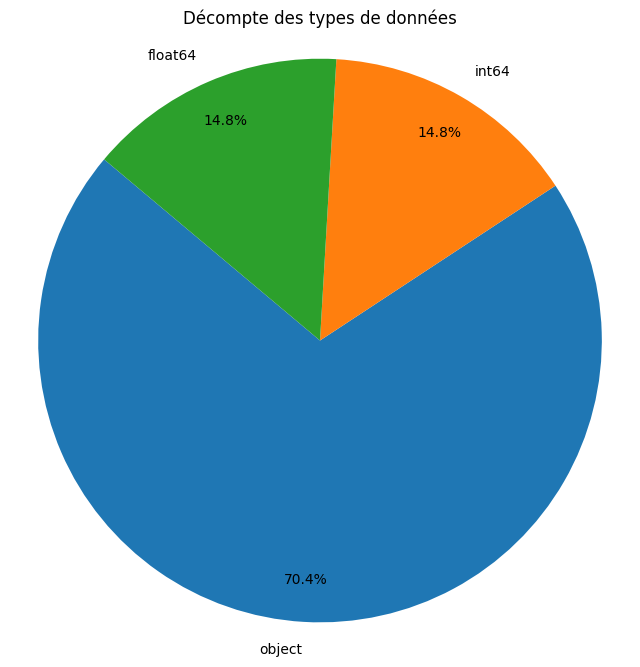

In [13]:
trajets.plot_dtypes_pie_chart()

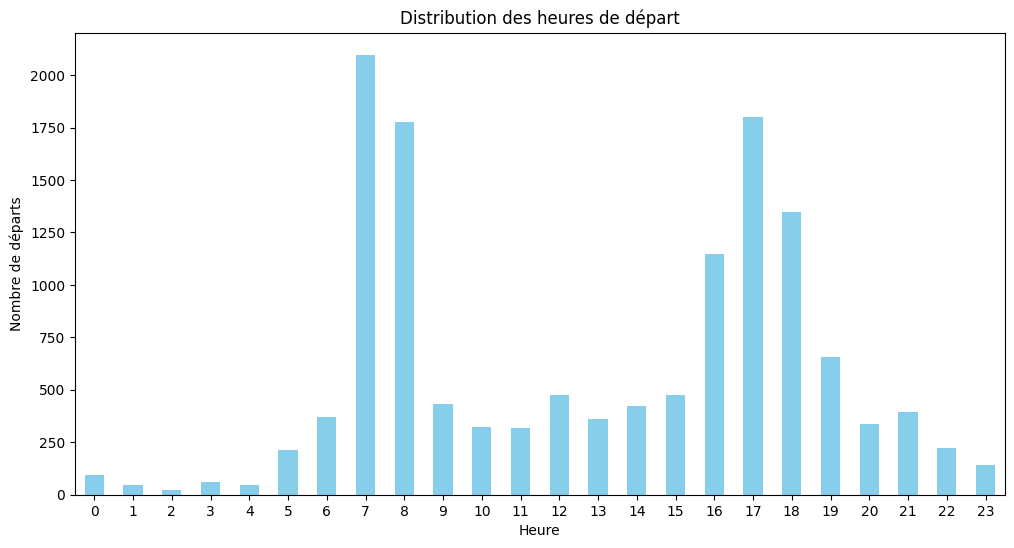

Heures de pointe détectées :
7     2097
8     1775
16    1145
17    1800
18    1347
Name: hour, dtype: int64


In [62]:
# Supposons que vous avez un DataFrame appelé df avec une colonne 'journey_start_datetime'
# Assurez-vous que la colonne est un objet datetime
df['journey_start_datetime'] = pd.to_datetime(df['journey_start_datetime'])

# Extrait l'heure de chaque entrée
df['hour'] = df['journey_start_datetime'].dt.hour

# Compte le nombre d'occurrences pour chaque heure
hour_counts = df['hour'].value_counts().sort_index()

# Tracez un graphique pour visualiser les heures de pointe
plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution des heures de départ')
plt.xlabel('Heure')
plt.ylabel('Nombre de départs')
plt.xticks(rotation=0)
plt.show()

# Identifiez les heures de pointe (vous pouvez personnaliser cela en fonction de vos propres critères)
peak_hours = hour_counts[hour_counts > 1000]

print("Heures de pointe détectées :")
print(peak_hours)


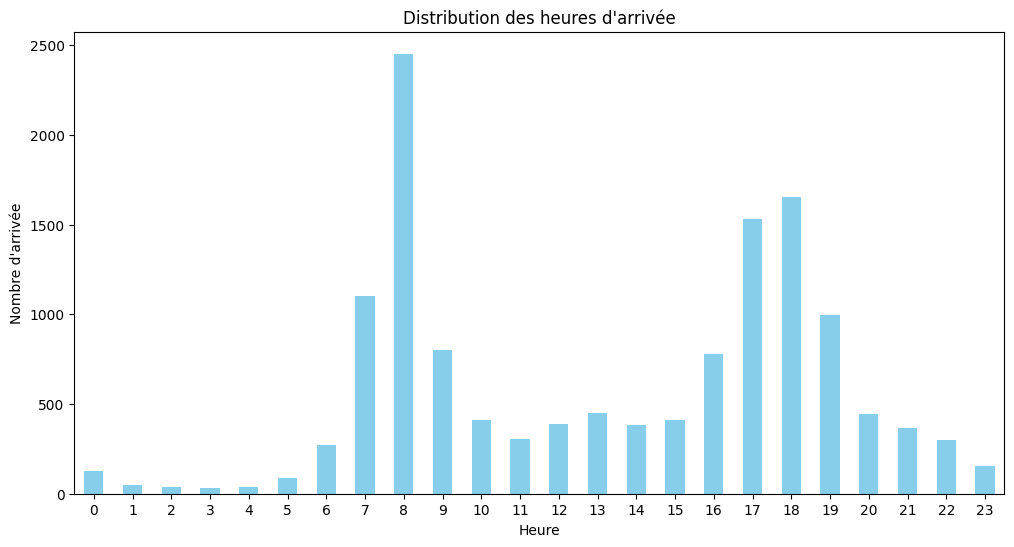

Heures de pointe détectées :
7     1104
8     2453
17    1531
18    1657
Name: hour, dtype: int64


In [63]:
df['journey_end_datetime'] = pd.to_datetime(df['journey_end_datetime'])

# Extrait l'heure de chaque entrée
df['hour'] = df['journey_end_datetime'].dt.hour

# Compte le nombre d'occurrences pour chaque heure
hour_counts = df['hour'].value_counts().sort_index()

# Tracez un graphique pour visualiser les heures de pointe
plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des heures d'arrivée")
plt.xlabel('Heure')
plt.ylabel("Nombre d'arrivée")
plt.xticks(rotation=0)
plt.show()

# Identifiez les heures de pointe (vous pouvez personnaliser cela en fonction de vos propres critères)
peak_hours = hour_counts[hour_counts > 1000]

print("Heures de pointe détectées :")
print(peak_hours)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13576 entries, 57 to 506521
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   journey_id                13576 non-null  int64  
 1   trip_id                   13576 non-null  object 
 2   journey_start_datetime    13576 non-null  object 
 3   journey_start_date        13576 non-null  object 
 4   journey_start_time        13576 non-null  object 
 5   journey_start_lon         13576 non-null  float64
 6   journey_start_lat         13576 non-null  float64
 7   journey_start_insee       13576 non-null  object 
 8   journey_start_department  13576 non-null  object 
 9   journey_start_town        13576 non-null  object 
 10  journey_start_towngroup   13576 non-null  object 
 11  journey_start_country     13576 non-null  object 
 12  journey_end_datetime      13576 non-null  object 
 13  journey_end_date          13576 non-null  object 
 14  jour

In [15]:
count1=trajets.count_unique_values("journey_start_town")
print(count1)
print(";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;")
count2=trajets.count_unique_values("journey_end_town")
print(count2)

Rouen                6844
Val-de-Reuil          442
Barentin              290
Mont-Saint-Aignan     219
Grand-Couronne        218
                     ... 
Paris                   1
Les Hogues              1
Pont-Audemer            1
Mesnils-sur-Iton        1
Quevillon               1
Name: journey_start_town, Length: 259, dtype: int64
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
Rouen                        7050
Val-de-Reuil                  452
Barentin                      277
Mont-Saint-Aignan             248
Saint-Ãtienne-du-Rouvray     213
                             ... 
La FrÃ©naye                     1
LÃ©ry                           1
Cany-Barville                   1
Saint-Didier-des-Bois           1
GrÃ©monville                    1
Name: journey_end_town, Length: 254, dtype: int64


In [16]:
(trajets.count_unique_values("journey_end_country"),trajets.count_unique_values("journey_start_country"))

(France    13576
 Name: journey_end_country, dtype: int64,
 France    13576
 Name: journey_start_country, dtype: int64)

In [17]:
trajets.calculate_missing_percentage()

journey_id                  0.0
journey_distance            0.0
operator_class              0.0
passenger_seats             0.0
journey_end_country         0.0
journey_end_towngroup       0.0
journey_end_town            0.0
journey_end_department      0.0
journey_end_insee           0.0
journey_end_lat             0.0
journey_end_lon             0.0
journey_end_time            0.0
journey_duration            0.0
journey_end_date            0.0
journey_start_country       0.0
journey_start_towngroup     0.0
journey_start_town          0.0
journey_start_department    0.0
journey_start_insee         0.0
journey_start_lat           0.0
journey_start_lon           0.0
journey_start_time          0.0
journey_start_date          0.0
journey_start_datetime      0.0
trip_id                     0.0
journey_end_datetime        0.0
has_incentive               0.0
dtype: float64

### Heatmap des Valeurs Manquantes
La méthode plot_nan_heatmap() génère un heatmap des valeurs manquantes dans le jeu de données :

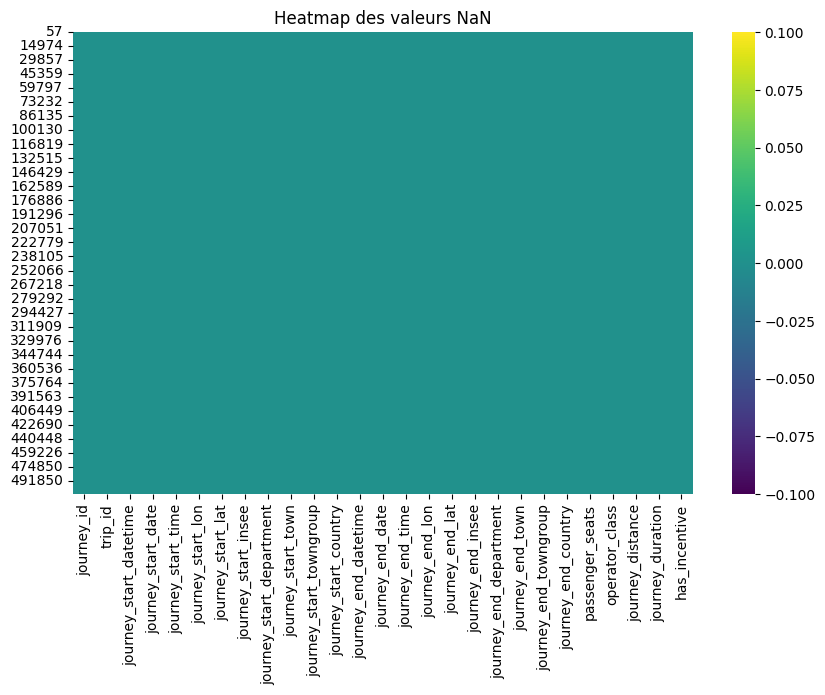

In [18]:
trajets.plot_nan_heatmap()

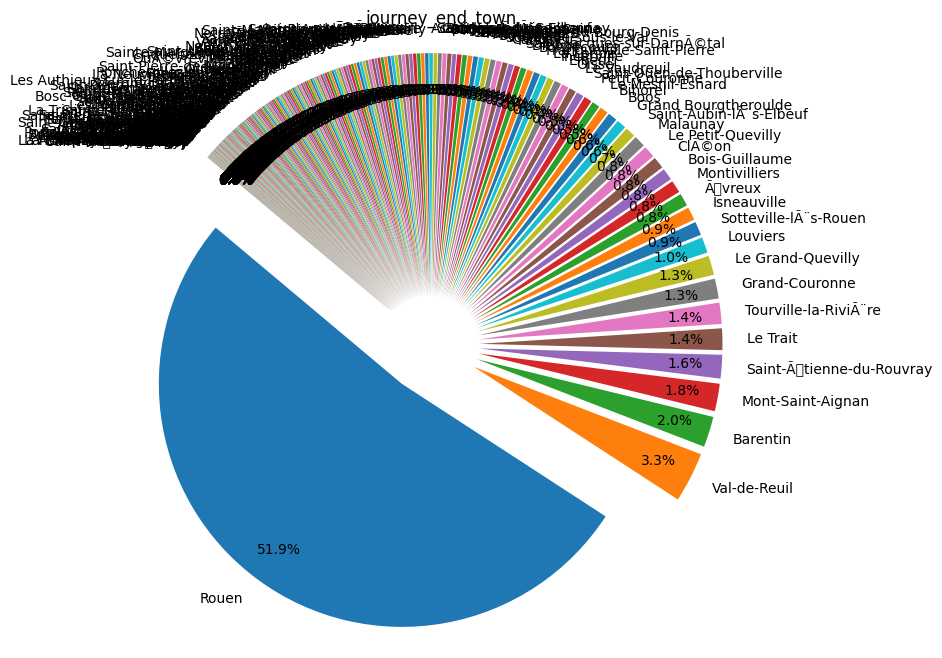

In [19]:
trajets.plot_pie_chart("journey_end_town")

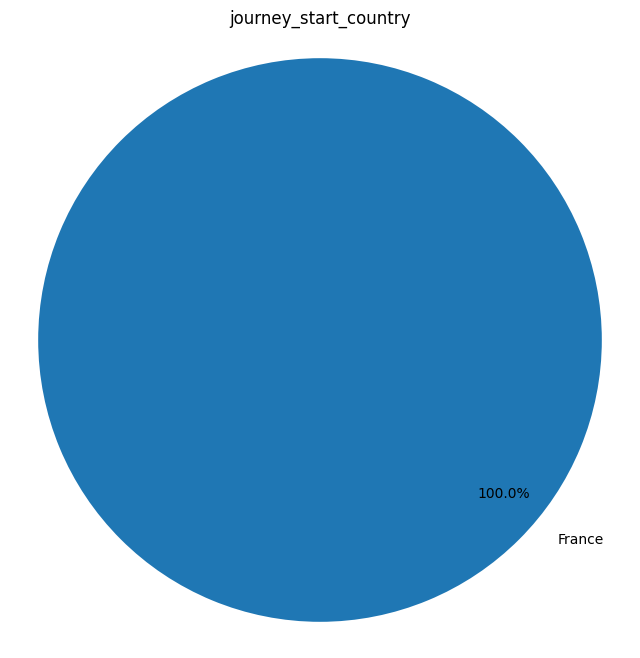

In [21]:
trajets.plot_pie_chart("journey_start_country")

# Diagramme de Dispersion
##### La méthode scatter_plot_with_categories(x_col, y_col, category_col, title) 
##### vous permet de créer un diagramme de dispersion coloré en fonction d'une colonne de catégories :

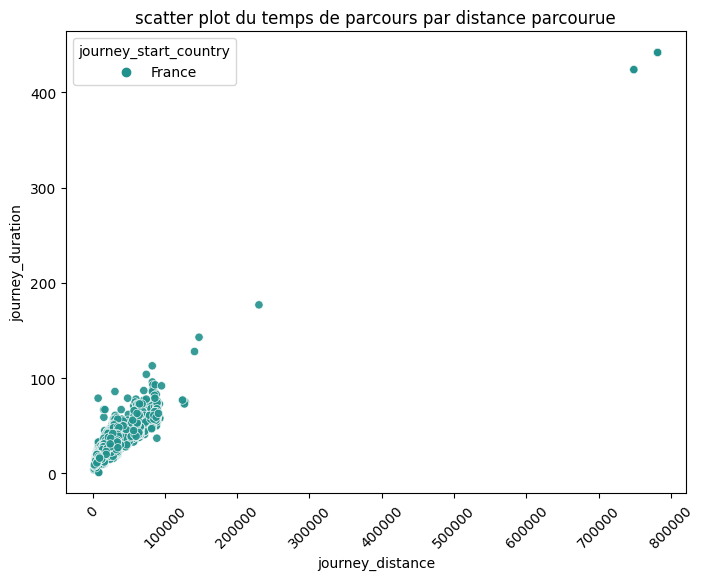

In [23]:
title="scatter plot du temps de parcours par distance parcourue"
trajets.scatter_plot_with_categories("journey_distance","journey_duration","journey_start_country",title=title)

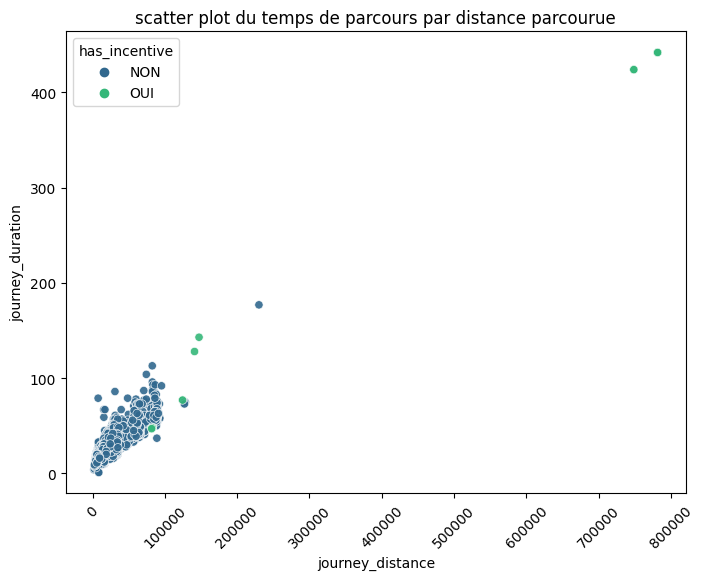

In [24]:
title="scatter plot du temps de parcours par distance parcourue"
trajets.scatter_plot_with_categories("journey_distance","journey_duration","has_incentive",title=title)

Cette méthode crée un graphique de dispersion (scatter plot) pour des données géographiques. Elle est principalement utile lorsque vous avez des données de latitude et de longitude que vous souhaitez visualiser sur une carte.

Paramètres :

longitude_col (str) : Le nom de la colonne contenant les valeurs de longitude.
latitude_col (str) : Le nom de la colonne contenant les valeurs de latitude.
title (str, facultatif) : Le titre du graphique (par défaut, pas de titre).

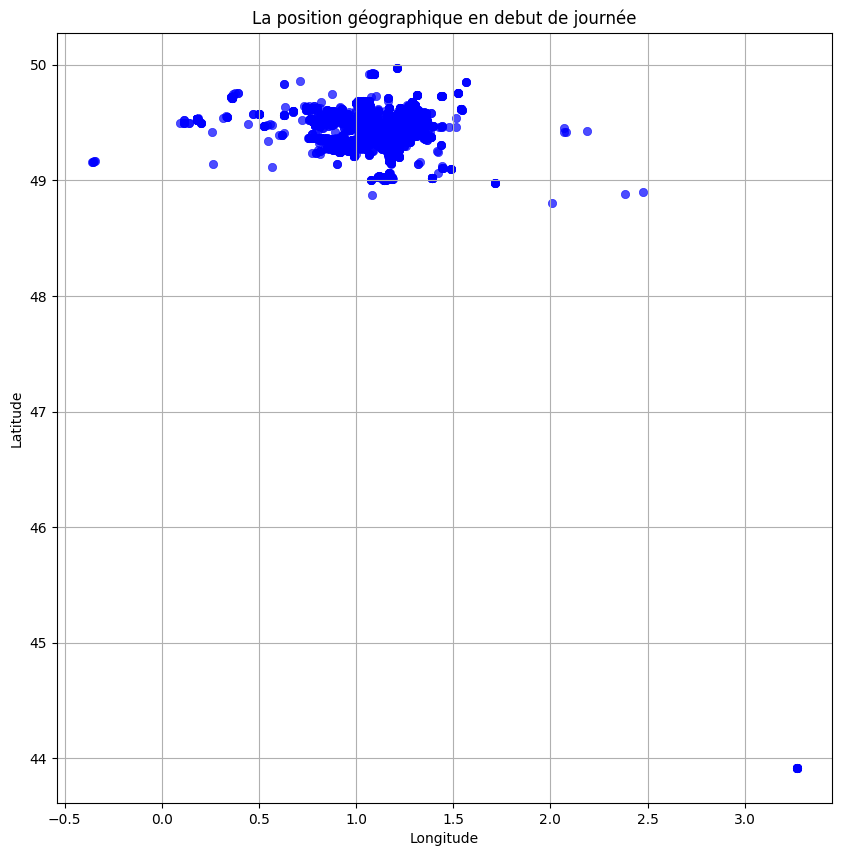

In [25]:
title="La position géographique en debut de journée"
trajets.plot_geographical_data("journey_start_lon","journey_start_lat",title=title)

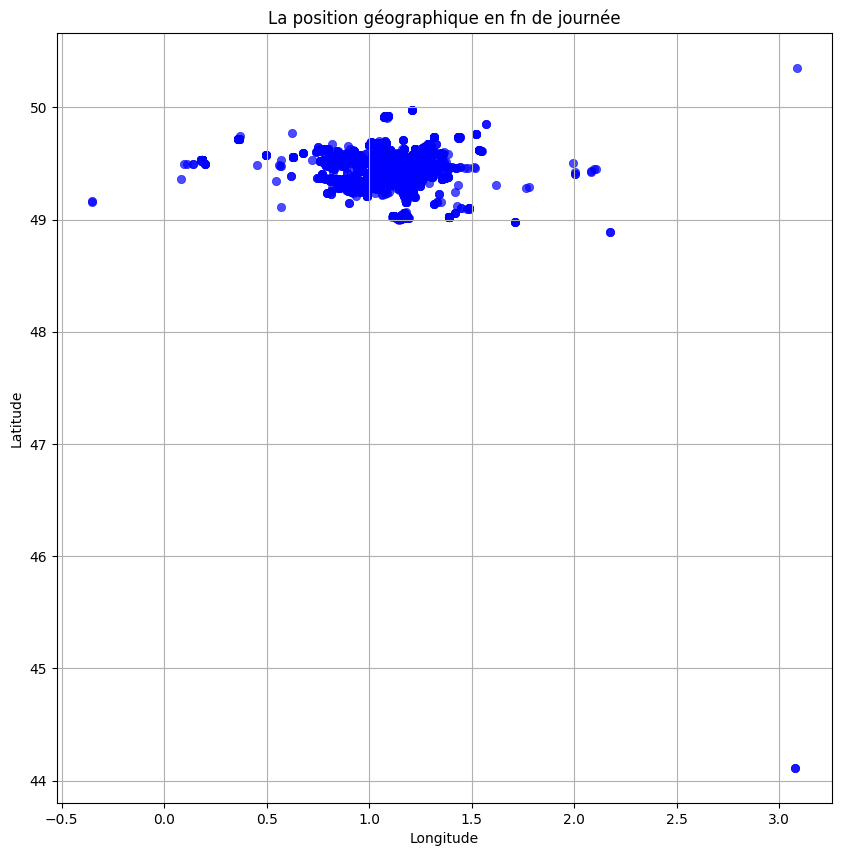

In [26]:
title="La position géographique en fn de journée"
trajets.plot_geographical_data("journey_end_lon","journey_end_lat",title=title)

### Etude sur la variable cible (has_incentive)

In [27]:
trajets.count_unique_values("has_incentive")

NON    13544
OUI       32
Name: has_incentive, dtype: int64

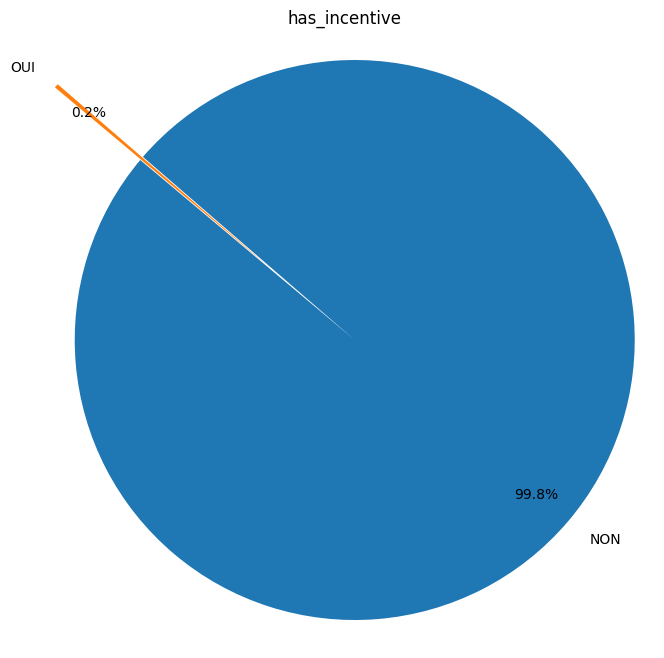

In [28]:
trajets.plot_pie_chart("has_incentive")

#### Histogramme des variables continues

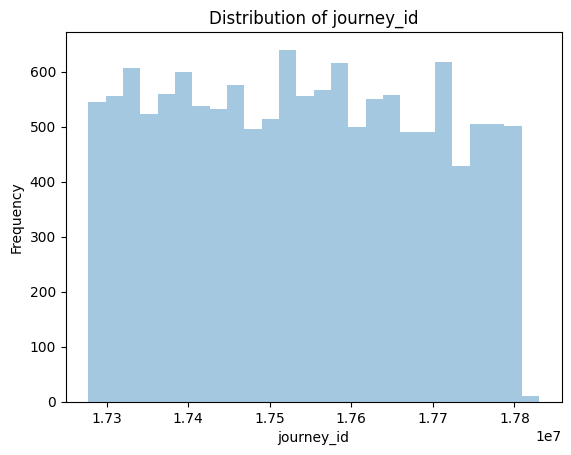

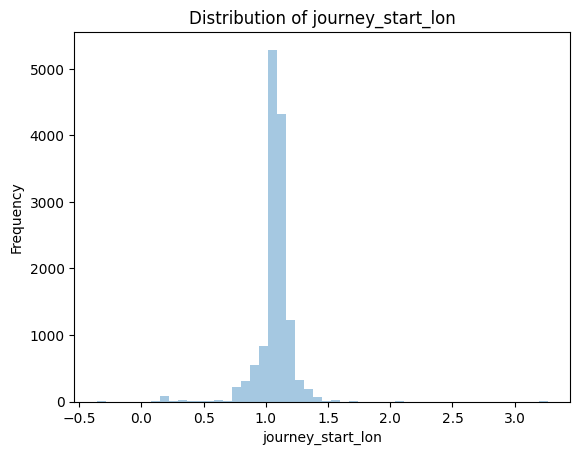

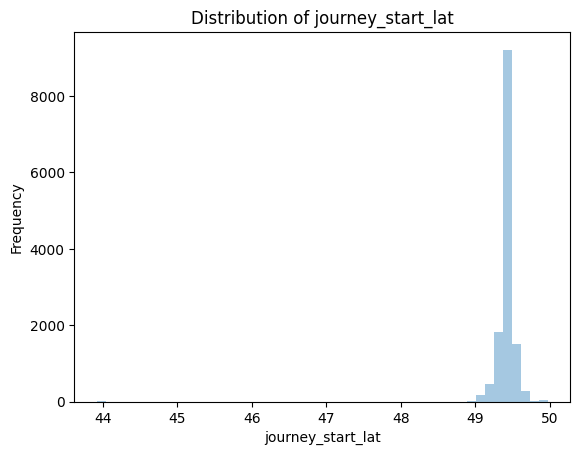

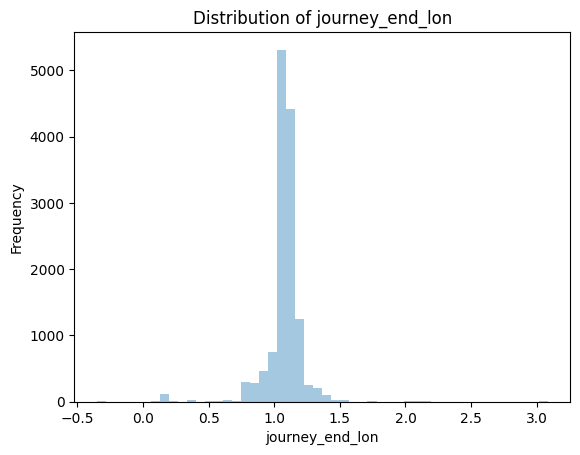

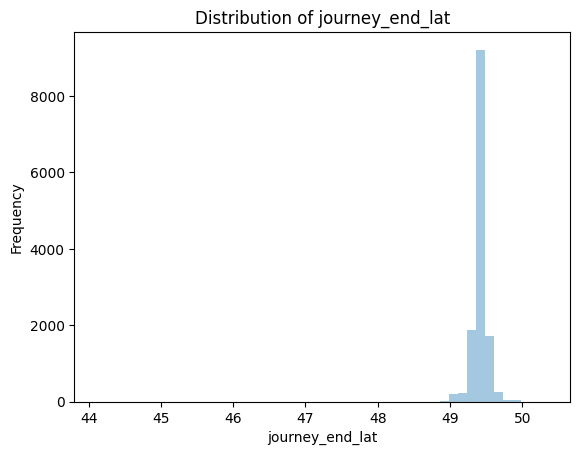

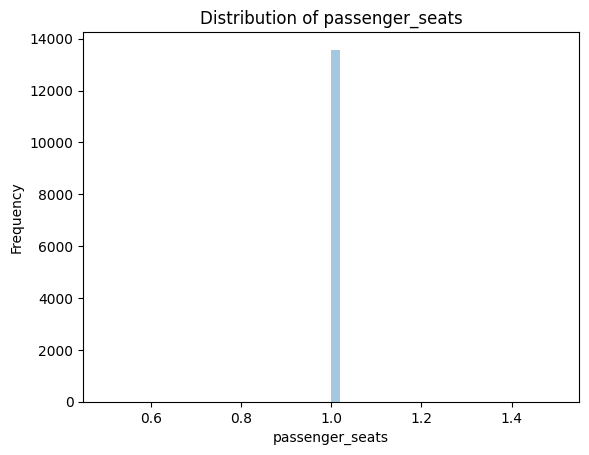

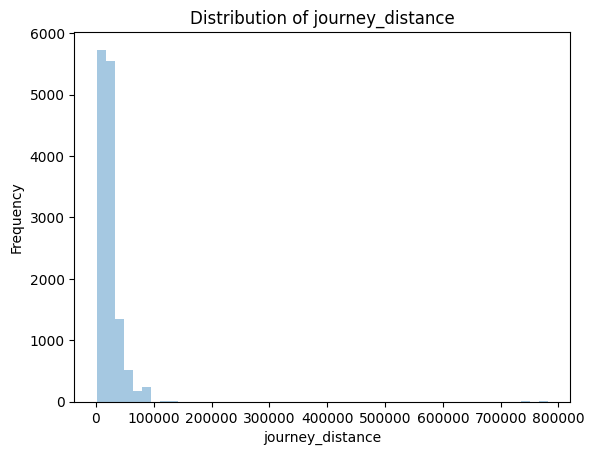

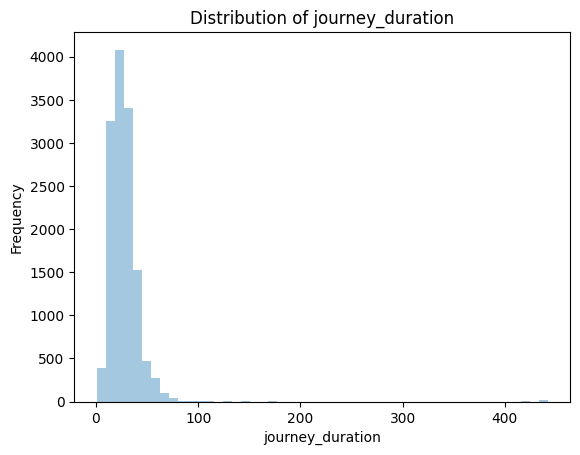

In [29]:
trajets.plot_numeric_distributions()

In [30]:
trajets.count_unique_values("operator_class")

C    13147
B      411
A       18
Name: operator_class, dtype: int64

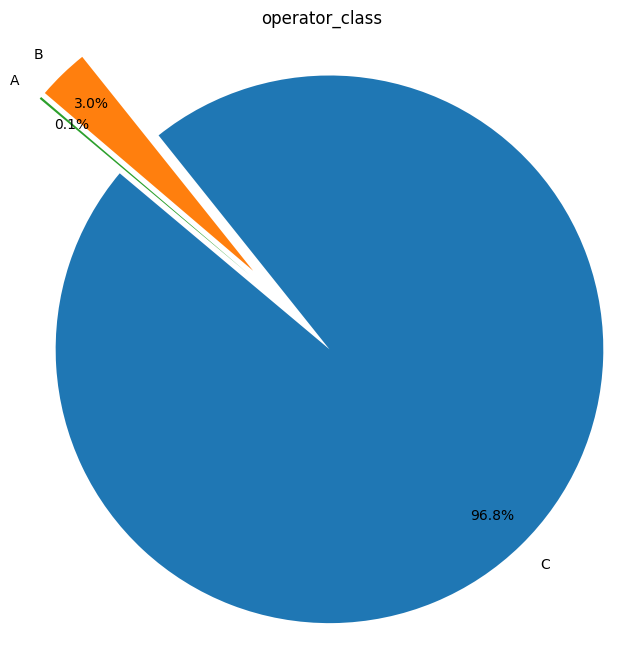

In [31]:
trajets.plot_pie_chart("operator_class")

### Variables qualitatives

In [32]:
trajets.display_unique_values()

trip_id              | Valeurs uniques : d2a0a6fe-b8fa-4a1b-aae6-a21ca99c10d3, 8ed2d495-7515-4546-8cb0-19a464122142, d2ddd2f4-bdd5-4e81-94bc-a2974a4f5dcb, 74fe92cd-c8c8-4e75-89ab-89408f3e2ffd, 0a5d78f0-ef23-4824-9c6f-e0e0d91d8af0, b39ed579-c82b-4fdd-bc7e-32c8c245bd0d, aa851fa6-5b68-4ca8-a9ad-34f2b43d1fae, 1ae3503e-c236-41cc-8944-908423e3bf60, 38a63869-d37c-4a94-b684-8916858446b8, 57812c02-1147-4f91-83c5-d558162d6927, 82faf4ad-47cb-478e-b0fb-b13543478085, d91c9cb8-e3d6-47b4-971b-18e81c076dd1, cc51fc48-c5cb-4055-85a9-dceccfcf646e, f3fed8a0-6ba3-4c3c-82a9-aa9ed746e1e9, c5baa34b-84b1-4b4c-b4a2-276fb8f96d42, 702091c4-4df0-45d3-bef3-3f9271a165c6, c77358da-d51f-45c9-a905-95fbe2671fca, f67308e0-37c5-431e-81d9-4496940b6ae7, b5f71bd3-dae0-4305-8f98-fc2371c8aedc, 3c007f93-7c69-4284-af1b-bdefd4941c2a, c1edcb83-028c-4a70-b367-929204c095db, 42f18c6e-f973-42a8-8973-b8f12cf19b60, 31e07718-a426-4f81-816f-3f80f30bbc9f, 51ee9c41-39f4-4a76-83fc-662bb90a651c, c13a03d9-c652-40ab-8769-ecfe962a0b38, 663a423b-

### Relation Target / Variables




##### Target/duration+distance

In [33]:
colonne=["journey_distance","journey_duration"]

colonne: journey_distance


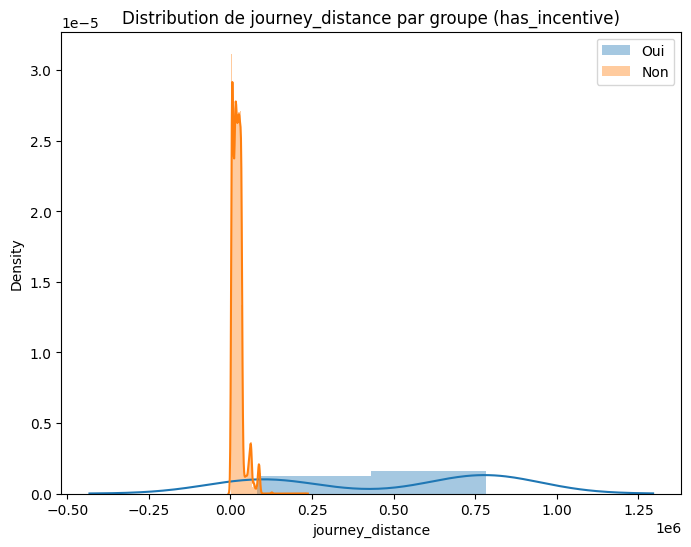

colonne: journey_duration


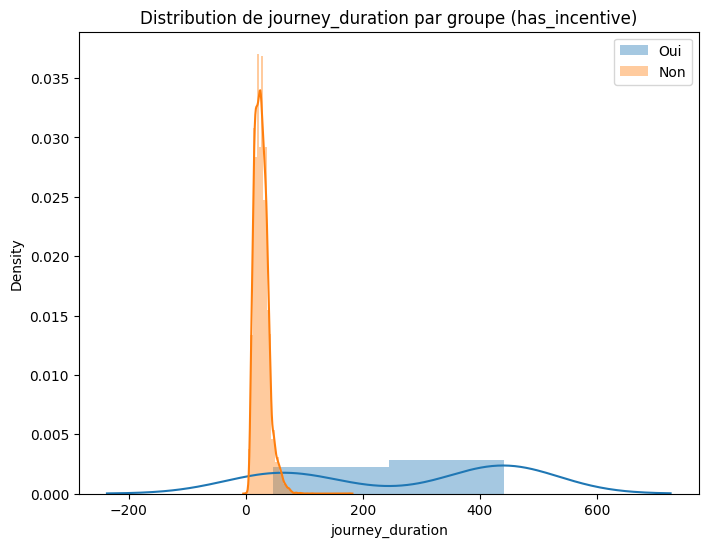

In [34]:
trajets.plot_distribution_comparison(colonne,"has_incentive")

## Diagramme à Barres
Créez un diagramme à barres à partir d'une colonne de données avec plot_count(colonne). 
Par exemple, pour visualiser la répartition des trajets en fonction du jour de la semaine :

### Relation target/operator_class

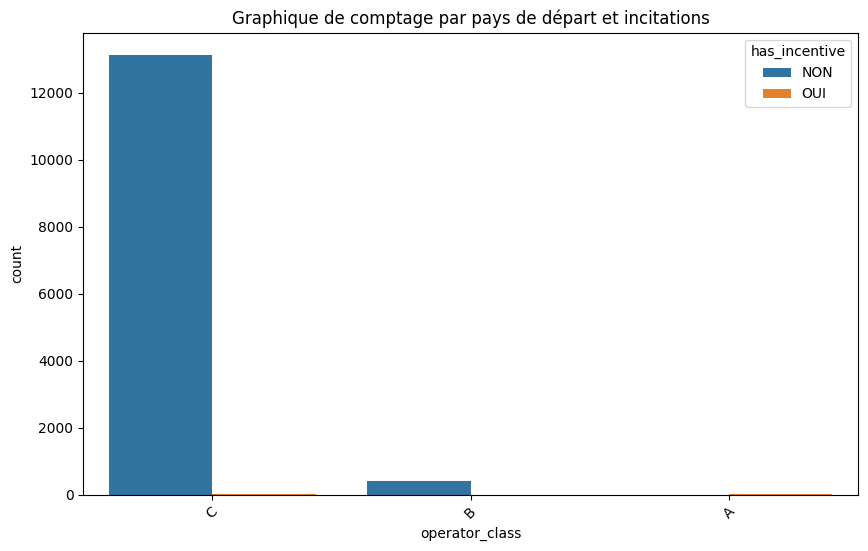

In [35]:
trajets.plot_count("operator_class")

#### Relation target/country

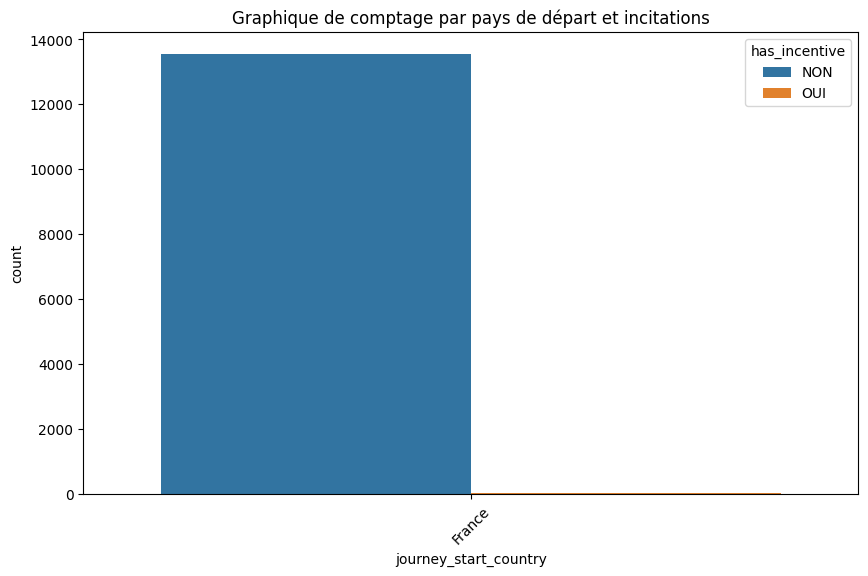

In [37]:
trajets.plot_count("journey_start_country")

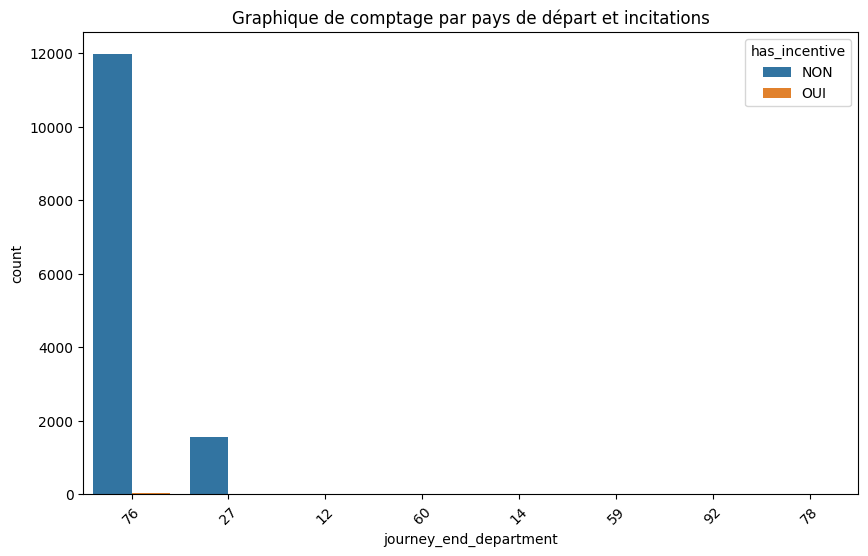

In [38]:
trajets.plot_count("journey_end_department")

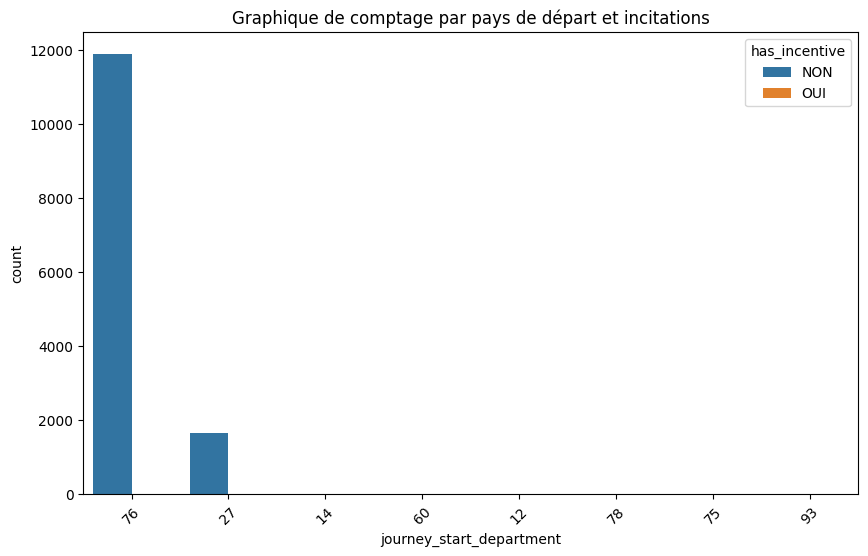

In [39]:
trajets.plot_count("journey_start_department")

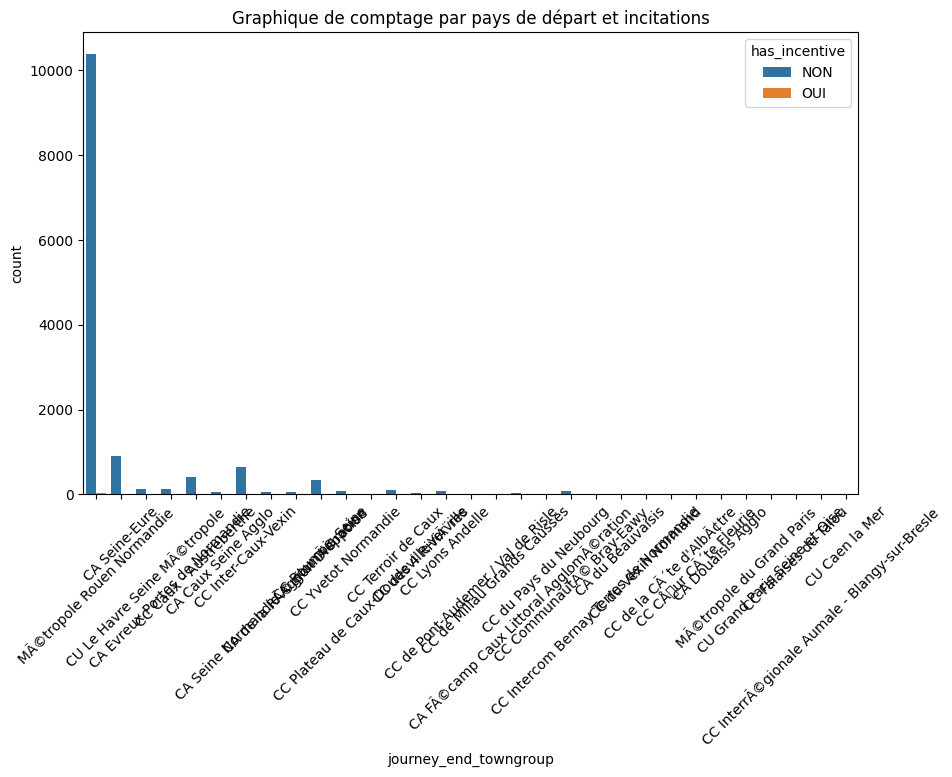

In [40]:
trajets.plot_count("journey_end_towngroup")

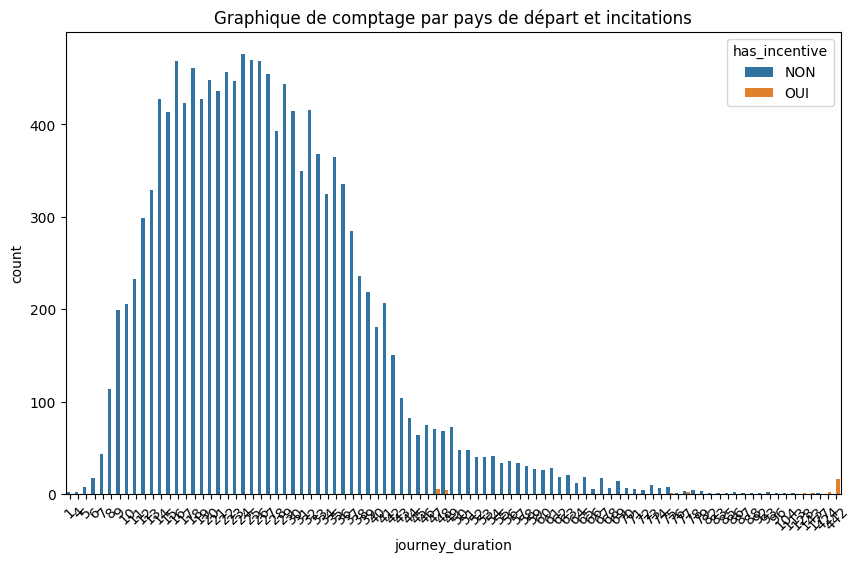

In [41]:
trajets.plot_count("journey_duration")

In [42]:
trajets.correlation_with_duration("journey_duration")

journey_start_lat   -0.685466
journey_end_lat     -0.168604
journey_end_lon     -0.052586
journey_id          -0.019937
journey_start_lon    0.264379
journey_distance     0.945003
journey_duration     1.000000
passenger_seats           NaN
Name: journey_duration, dtype: float64

In [43]:
trajets.correlation_with_duration("journey_distance")

journey_start_lat   -0.741776
journey_end_lat     -0.175595
journey_end_lon     -0.064310
journey_id          -0.028352
journey_start_lon    0.291324
journey_duration     0.945003
journey_distance     1.000000
passenger_seats           NaN
Name: journey_distance, dtype: float64

## Tableau Croisé Dynamique
La méthode generate_crosstab(column1, column2) génère un tableau croisé dynamique entre deux colonnes :

In [44]:
trajets.generate_crosstab('operator_class','journey_end_town')

journey_end_town,Acquigny,Alizay,Allouville-Bellefosse,Amfreville-Saint-Amand,Amfreville-la-Mi-Voie,Anceaumeville,Anneville-Ambourville,Authieux-RatiÃ©ville,Auzebosc,Auzouville-sur-Ry,...,Ymare,Yquebeuf,Yvetot,Yville-sur-Seine,Ãcalles-Alix,Ãcouis,Ãpinay-sur-Duclair,Ãpreville,ÃtrÃ©pagny,Ãvreux
operator_class,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,0,1,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,6
C,33,4,3,2,20,4,1,4,2,16,...,18,14,18,2,5,1,7,21,0,109


In [45]:
trajets.generate_crosstab('operator_class','has_incentive')

has_incentive,NON,OUI
operator_class,,
A,0,18
B,411,0
C,13133,14


In [46]:
trajets.generate_crosstab('journey_start_country','has_incentive')

has_incentive,NON,OUI
journey_start_country,,
France,13544,32


In [47]:
trajets.generate_crosstab('journey_end_country','has_incentive')

has_incentive,NON,OUI
journey_end_country,,
France,13544,32


In [48]:
trajets.generate_crosstab('journey_start_department','has_incentive')

has_incentive,NON,OUI
journey_start_department,,
12,0,16
14,7,0
27,1646,0
60,4,0
75,0,1
76,11887,8
78,0,6
93,0,1


In [49]:
trajets.generate_crosstab('journey_end_department','has_incentive')

has_incentive,NON,OUI
journey_end_department,,
12,0,2
14,3,0
27,1555,0
59,1,0
60,8,0
76,11977,24
78,0,4
92,0,2


In [50]:
trajets.count_unique_values("journey_start_town")

Rouen                6844
Val-de-Reuil          442
Barentin              290
Mont-Saint-Aignan     219
Grand-Couronne        218
                     ... 
Paris                   1
Les Hogues              1
Pont-Audemer            1
Mesnils-sur-Iton        1
Quevillon               1
Name: journey_start_town, Length: 259, dtype: int64

### Création de Cartes Géographiques

Vous pouvez également créer des cartes géographiques interactives pour visualiser les trajets de covoiturage. La classe TrajetCovoiturage vous permet de générer des cartes avec des marqueurs de départ en bleu et d'arrivée en rouge. Voici comment créer une carte de covoiturage:

In [ ]:
import folium
trajets.create_route_map()

### Heatmap Géographique
Pour générer un heatmap des trajets de covoiturage basé sur les coordonnées géographiques, utilisez la méthode create_heatmap( output_file) :

In [ ]:
from folium import plugins
trajets.create_heatmap("journey_end_lat","journey_end_lon",output_file="Journey_end_heatmap_carte.html")

In [ ]:
from folium import plugins
trajets.create_heatmap("journey_start_lat","journey_start_lon",output_file="Journey_start_heatmap_carte.html")

In [10]:
trajets.generate_eda_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]